Binary classifier

y wage

1. Rows . 32561 columns 4

2. Do we have missing data ? No

3.we have  8  no-numerical, 6 are numerical
180 . feature

strip spaces for all columns before  cleaning.

4. Convert  to numerical

>Y  -> no nulls , 01 , 
>1. workclass - not -ordinal , 1 percent of data has ?
>2. education -  Drop this  column as  education-num  provides us these buckets
        1- preschool
        2- 1-4
        3 -5and6
        4- 7-8
        5- 9th 
        6-10 th grade
        7 - 11th grade
        8 - 12th grade
        9 -HSC grad
        10- some college
        11 -associate voc
        12 - associate adm
        13 . - bacheleos
        14- masters
        15 - pref school
        16 -Doctorate
>3 maritial status - dummify

>4occupation  - ? with  0.5 percent , 15 categories

>5 Relationship  - 6 categories
>6 sex-  binary

>7 Native country - 42 countries
, 583 42  countries
US and non-US


education- num . - categorical ordinal values


# Con-verting non-numerical columns to numerical

|  column |Categories|Type   | description  | Missing data|  
|---|---|---|---|--- |
| wage  |2   |binary |  Converted to 0 as < 50k and 1  > |   |   |
|workclass|9 |nominal| dummified 
| education | 60  | ordinal | Dropped as education-num has same information in numeric form  |   |   |
| marital_status  | 5  | nominal  |   | 5  |
|occupation |15 |noimnal |
|relationship| 6|nominal | skip for now as it might be same as marital_status|Husband,Not-in-family,Own-child,Unmarried,Wife,Other-relative
|sex |2 |nominal | 0 - Male , 1 - Female | none
|native-country|42 |nominal | United-States= 1 , Other -0 |

# Converting the capital gain and capital loss to be  ordinal  variable . categories

Where

Continuous Columns
> 1. Capital gain
0 - no
1-30,000 - low
31000 and higher -high


>2.  capital loss
0 - no
1 -3000 -low 
above 3000 - high 


In [91]:
def covert_capital_loss(x):   
    if(x ==0) :
        return 0
    elif(x <=3000):
        return 1
    else:
       return 2
wage['capital-loss'] = wage['capital-loss'].map(covert_capital_loss)

In [90]:
wage[['capital-gain','capital-loss']]

,capital-gain,capital-loss
0,2174,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
32556,0,0
32557,0,0
32558,0,0
32559,0,0


In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [88]:
wage =pd.read_csv("./data/large_train_sample.csv")

In [6]:
wage.head(1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K


In [7]:
wage.shape


(32561, 14)

In [8]:
wage.isnull().sum().sum()

0

In [9]:
wage['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [10]:
wage['education-num'].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education-num, dtype: int64

In [11]:
wage.iloc[12318 , :]

age                           17
workclass                Private
fnlwgt                    127366
education                   11th
education-num                  7
marital-status     Never-married
occupation                 Sales
relationship           Own-child
sex                       Female
capital-gain                   0
capital-loss                   0
hours-per-week                 8
native-country     United-States
wage                       <=50K
Name: 12318, dtype: object

In [12]:
wage['education-num'].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education-num, dtype: int64

In [13]:

wage.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
wage              object
dtype: object

In [17]:
wage.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [ ]:
# Convert target to a numerical binary column

In [37]:
wage['wage'].dtype

dtype('O')

In [38]:
wage['wage'].value_counts()

 <=50K    24720
 >50K      7841
Name: wage, dtype: int64

In [41]:
wage["wage_num"] = wage["wage"].str.strip().map({'<=50K' : 0 ,'>50K' :1 })

In [45]:
wage['wage_num'].value_counts()

0    24720
1     7841
Name: wage_num, dtype: int64

#workclass -  convert  to numverical

In [48]:
wage['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [58]:
wage[wage['workclass'].str.contains("\?")]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage,wage_num
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Male,0,0,60,South,>50K,1
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,Male,0,0,40,?,<=50K,0
69,25,?,200681,Some-college,10,Never-married,?,Own-child,Male,0,0,40,United-States,<=50K,0
77,67,?,212759,10th,6,Married-civ-spouse,?,Husband,Male,0,0,2,United-States,<=50K,0
106,17,?,304873,10th,6,Never-married,?,Own-child,Female,34095,0,32,United-States,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,Female,0,0,55,United-States,>50K,1
32531,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Female,0,0,99,United-States,<=50K,0
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,Male,0,0,10,United-States,>50K,1
32541,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Female,0,0,32,United-States,<=50K,0


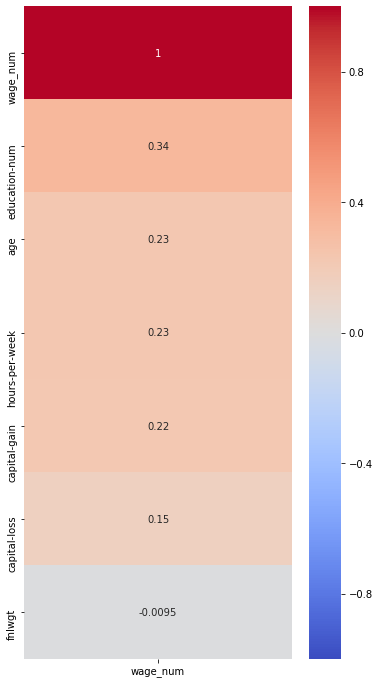

In [59]:
 apps_core = wage.corr()[['wage_num']].sort_values(by='wage_num',ascending=False)
 plt.figure(figsize=(6,12))  # 6 by 12 inch to make plot bigger
 sns.heatmap(apps_core, vmin=-1,vmax=1,cmap='coolwarm',annot=True)

In [67]:
wage.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage,wage_num
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K,0



#References


https://stackoverflow.com/questions/40950310/strip-trim-all-strings-of-a-dataframe

In [ ]:
fnlwgt
relationship

native _counytr
